<a href="https://colab.research.google.com/github/ssweta3seal/Customer_Segmentation/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the modules that will be required over the course of flow throughout this project
import numpy as np
import pandas as pd
import math
import datetime as dt


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from IPython.display import display_html 


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading Dataset**

In [ ]:
#Reading the data file
online_data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Machine Learning Capstone project/UNSUPERVISED/Customer Segmentation/Online Retail.csv', encoding="unicode_escape")


# **Exploring the data in the given dataset**

In [ ]:
#Data in the top 5 rows 
online_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
#Data in the last 5 rows 
online_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
# Printing the shape of the dataset
online_data.shape

(541909, 8)

In [ ]:
#checking the data types
online_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#Getting the statistical Summary of our dataset
online_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


We can see the min value in the Quantity is negative.Therefore, we must look for these negative values.

In [ ]:
#checking the data with negetive qty
online_data.loc[online_data.Quantity < 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
304681,C563600,22182,CAKE STAND VICTORIAN FILIGREE SMALL,-2,18-08-2011 06:24,4.95,14911.0,EIRE
352808,C567691,21669,BLUE STRIPE CERAMIC DRAWER KNOB,-34,21-09-2011 17:04,1.45,17567.0,United Kingdom
29528,C538804,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,14-12-2010 11:56,0.85,13769.0,United Kingdom
497343,C578363,21135,VICTORIAN METAL POSTCARD SPRING,-288,24-11-2011 10:40,0.40,15482.0,United Kingdom
122727,C546886,21843,RED RETROSPOT CAKE STAND,-1,17-03-2011 18:13,10.95,12520.0,Germany
70657,C542092,20723,STRAWBERRY CHARLOTTE BAG,-2,25-01-2011 12:45,0.72,14389.0,United Kingdom
481967,C577397,22236,CAKE STAND 3 TIER MAGIC GARDEN,-1,18-11-2011 17:12,12.75,12504.0,Germany
29051,C538692,22801,ANTIQUE GLASS PEDESTAL BOWL,-1,14-12-2010 09:58,3.75,13599.0,United Kingdom
390538,C570556,22570,FELTCRAFT CUSHION RABBIT,-240,11-10-2011 11:10,3.39,16029.0,United Kingdom
513449,C579554,22588,CARD HOLDER GINGHAM HEART,-2,30-11-2011 11:05,2.89,13924.0,United Kingdom


In [ ]:
#Let's have a look at the most expensive item in the store.
online_data[online_data.UnitPrice == online_data.UnitPrice.max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,10-06-2011 15:31,38970.0,15098.0,United Kingdom


From the above review on dataset we have some observations:

Most Invoices appear as normal transcations with positive quantity and prices, but there are some values in the quantity column that are addressed as negative quatity posses invoice number starting with 'C',therefore all these belong to cancelled orders.

Empty or Null values are in CustomerID are around 135080 that need to be treated.

Here we have a data for 38 different countries.

There are total 10624 record where the quantity is negative.
Average Unit price of all the items in the store is coming out to be 4.6 sterling.

Most expensive item in the store is Manual,whose cost is 38970 sterling and that too is a cancelled order.

We should further break-down the InvoiceDate column to draw some more insights.

##**Data Pre-processing**

In [ ]:
# Checking for Null values
online_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Maximum number of missing values are coming from customer_id and we will drop such values.

In [ ]:
#Dropping the null values in the dataset
online_data.dropna(subset=['CustomerID'],inplace=True)

In [ ]:
# Checking for Null values
online_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now our dataset has no null values

In [ ]:
online_data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

##**Checking for the Duplicate values:**

In [ ]:
# Checking for an duplicated values
online_data.duplicated().sum()

5225

If two records are same,the StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country but invoice number cannot be same therefore we must drop the duplicate records.

In [ ]:
#Drop the duplicated values
online_data.drop_duplicates(inplace=True)

In [ ]:
# Checking for an duplicated values
online_data.duplicated().sum()

0

In [ ]:
online_data.shape

(401604, 8)

In [ ]:
online_data['InvoiceNo'] = online_data['InvoiceNo'].astype('str')

In [ ]:
online_data=online_data[~online_data['InvoiceNo'].str.contains('C')]

**we have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation**

In [ ]:
online_data.shape

(392732, 8)

In [ ]:
#Getting the statistical Summary of our dataset
online_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
CustomerID,392732.0,15287.734822,1713.567773,12346.0,13955.00,15150.00,16791.00,18287.00


##**EDA and Visualzation**

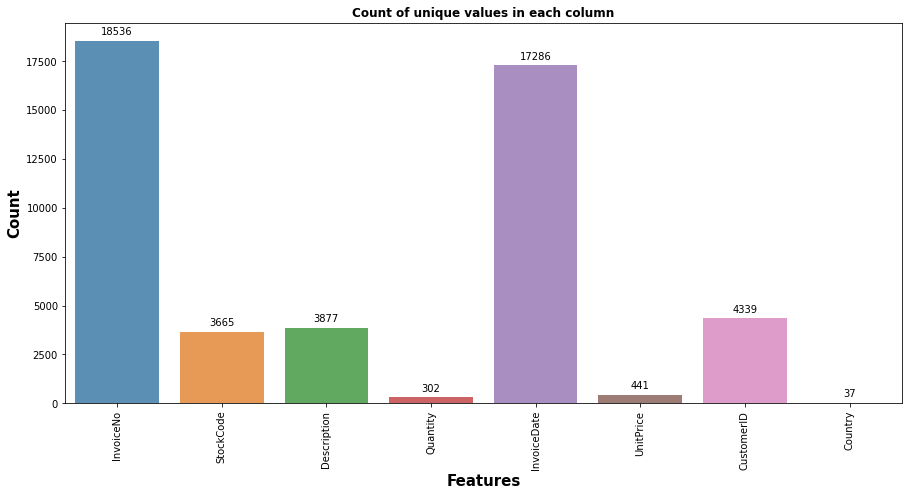

In [ ]:
#Let's understand the unique values through visualization

#Let's create a dataframe for the number of unique values 
online_data_nunique=pd.DataFrame()
online_data_nunique['Features']=online_data.columns
unique=[]
for i in online_data.columns:
  unique.append(online_data[i].nunique())
online_data_nunique['Uniques']=unique

# Plot the bar plot for the above results
f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=online_data_nunique['Features'], y=online_data_nunique['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Count of unique values in each column',weight='bold')
plt.ylabel('Count', size=15, weight='bold')
plt.xlabel('Features', size=15, weight='bold')
plt.xticks(rotation=90)
plt.show()

Although our dataset has initially 541909 records but the number of unique invoices generated are very less.

The number of unique countries available with us are 37 but before we did data preprocessing it was 38.We must look for the country that has vanished from the data.

##**Top 10 Countries w.r.t The Number Of Invoices Generated**

In [ ]:
#dataframe with unique invoices
country_online_data = online_data.groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
country_online_data

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


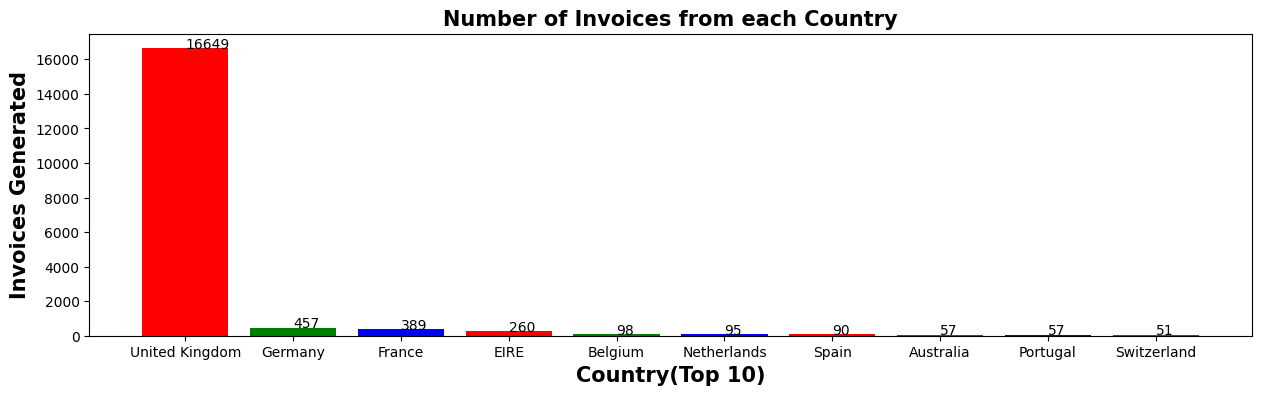

In [ ]:
# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,4),dpi=100)
plt.style.use('seaborn-colorblind')

# Define x and y 
x=country_online_data['Country']
y=country_online_data['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")

# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Invoices Generated",weight="bold",size=15)
plt.title("Number of Invoices from each Country",weight="bold",size=15)

## Showing the plot
plt.show()

In [ ]:
## Generating the dataframe of country w.r.t the Sucessfull orders generated
sales_online_data = online_data[~online_data['InvoiceNo'].str.startswith('C',na=False)].groupby('Country')[['InvoiceNo']].nunique().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()
sales_online_data

,Country,InvoiceNo
0,United Kingdom,16649
1,Germany,457
2,France,389
3,EIRE,260
4,Belgium,98
5,Netherlands,95
6,Spain,90
7,Australia,57
8,Portugal,57
9,Switzerland,51


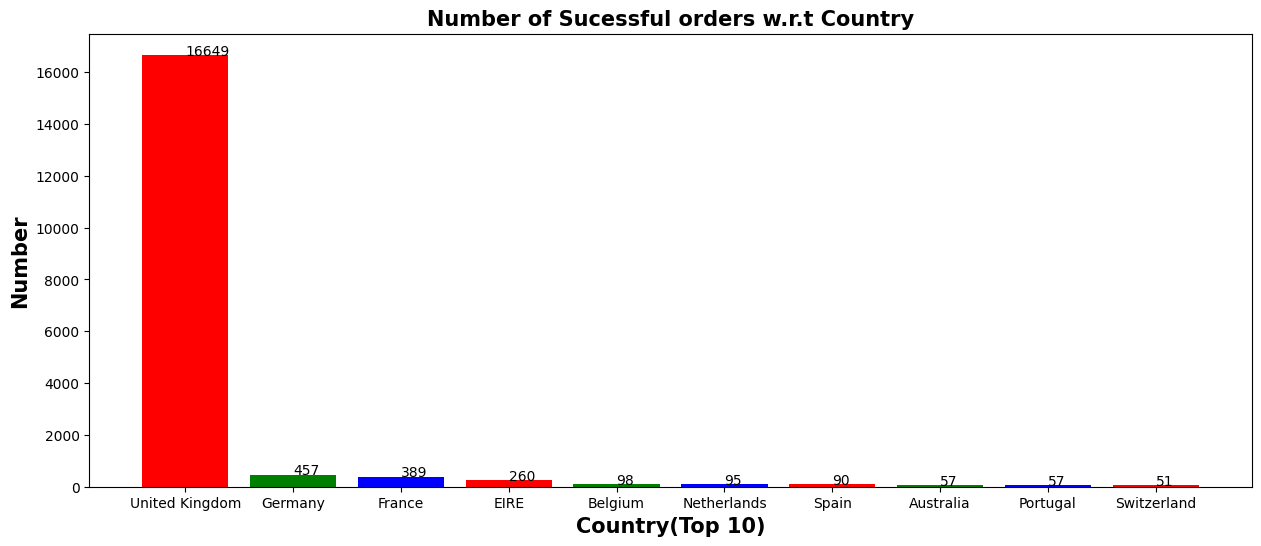

In [ ]:

# Let's learn through the visualization
fig, ax = plt.subplots(figsize=(15,6),dpi=100)
plt.style.use('seaborn-colorblind')

# Define x and y 
x=sales_online_data['Country']
y=sales_online_data['InvoiceNo']

# Plot the bar plot
plt.bar(x,y,color="rgb")


# Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country(Top 10)", weight="bold",size=15)
plt.ylabel("Number", weight="bold",size=15)
plt.title("Number of Sucessful orders w.r.t Country", weight="bold",size=15)

## Showing the plot
plt.show()

Cancelled Items
From the description,If this code starts with letter 'C', it indicates a cancellation.

In [ ]:
# Transactions with Cancelled Items.
cancelled = online_data[online_data.InvoiceNo.str.contains('C',na=False)]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:

#Creating the dataframe for cancelled orders
cancelled_orders=cancelled[['InvoiceNo','Country']].groupby('Country').count().sort_values(by='InvoiceNo', ascending=False).head(10).reset_index()

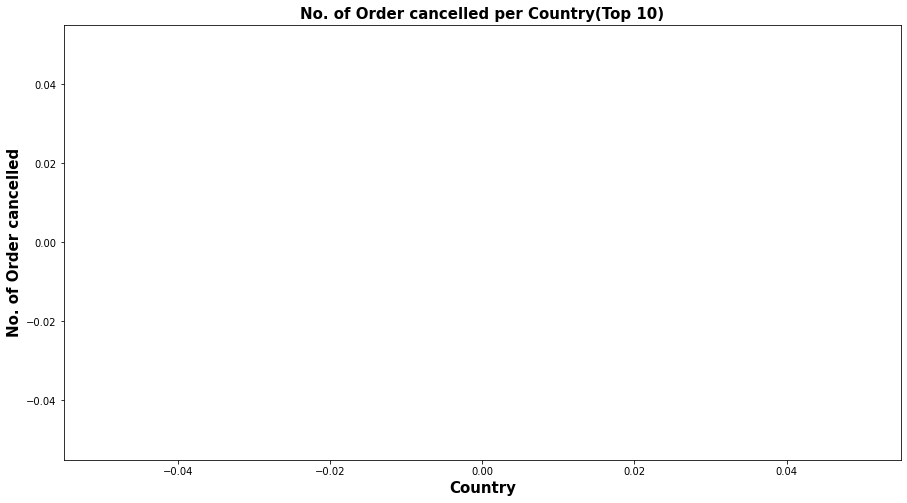

In [ ]:
# Learning through visualization
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancelled_orders['Country']
y=cancelled_orders['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=15, weight='bold')
plt.ylabel("No. of Order cancelled", size=15, weight='bold')
plt.title("No. of Order cancelled per Country(Top 10)",size=15, weight='bold')

## Showing the plot
plt.show()


United Kingdom has got the maximum number cancelled orders followed by Germany with considerable margin.
  
Australia,Spain,Italy,Belgium,Japan has least and almost negligible amount of cancelled orders.

In [ ]:
#Taking only invoices which were not cancelled
online_data = online_data[~online_data["InvoiceNo"].str.contains("C", na=False)]

#Taking only postive values from variables
online_data = online_data[online_data['Quantity']>0]
online_data = online_data[online_data['UnitPrice']>0]
online_data.shape

(392692, 8)

In [ ]:
# Changing The datatype of Date attribute to extract 'Month','Day',"Year". so that we can analyze the Bike rentals with respect to year, months and days.
online_data['InvoiceDate']=online_data['InvoiceDate'].astype('datetime64[ns]')

In [ ]:
# Filtering the dataset 
uk_data = online_data.loc[online_data['Country'] == 'United Kingdom']

##**Feature Engineering and EDA On New Features**

In [ ]:
# Adding new features month , day and hour from invoice date
uk_data['Invoice_day'] = uk_data['InvoiceDate'].dt.day_name()
uk_data['Invoice_hour'] = uk_data['InvoiceDate'].dt.hour 
uk_data['Invoice_month']=uk_data['InvoiceDate'].dt.to_period('M')
uk_data['month']=uk_data['InvoiceDate'].dt.month_name()
uk_data['purchase_date']=uk_data["InvoiceDate"].dt.date

In [ ]:
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12


In [ ]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349203 non-null  object        
 1   StockCode      349203 non-null  object        
 2   Description    349203 non-null  object        
 3   Quantity       349203 non-null  int64         
 4   InvoiceDate    349203 non-null  datetime64[ns]
 5   UnitPrice      349203 non-null  float64       
 6   CustomerID     349203 non-null  float64       
 7   Country        349203 non-null  object        
 8   Invoice_day    349203 non-null  object        
 9   Invoice_hour   349203 non-null  int64         
 10  Invoice_month  349203 non-null  period[M]     
 11  month          349203 non-null  object        
 12  purchase_date  349203 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(7), period[M](1)
memory usage: 37.3+ MB


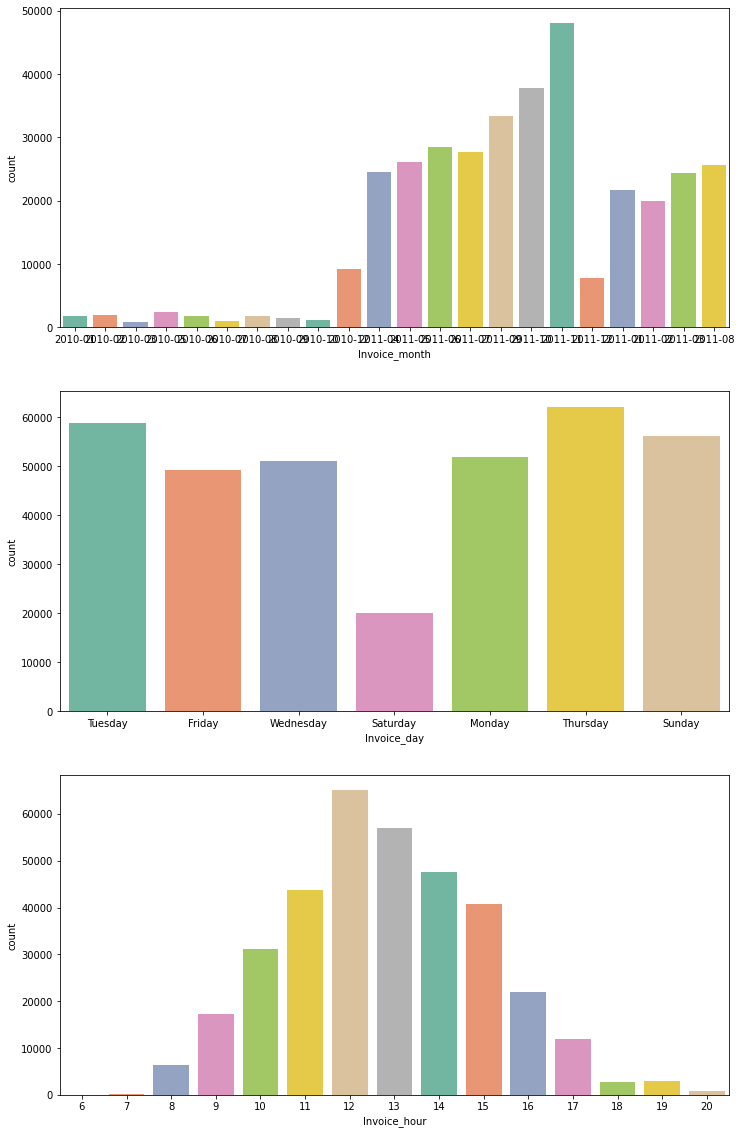

In [ ]:
columns = ['Invoice_month','Invoice_day','Invoice_hour']
fig = plt.figure(figsize=(12,20))
for i in range(len(columns)):
  col=columns[i]
  sub=fig.add_subplot(3,1,i+1)
  chart = sns.countplot(data=uk_data,x=col,palette="Set2")

##**Observations :**
Maximum amount of invoices were generated in the month of November in 2011 that crosses almost 6000 numbers.

Talking about day of the week,Thursday can be regarded as the most rushed day in the whole week.

Maximum rush was observed in the mid-day i.e. between 12 hrs to 14 hrs.

In [ ]:
# Calculate total price and add to the dataframe
uk_data["Total_sales"] = uk_data["UnitPrice"]*uk_data["Quantity"]

In [ ]:
# Looking at the applied changes
uk_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_day,Invoice_hour,Invoice_month,month,purchase_date,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,Tuesday,8,2010-01,January,2010-01-12,20.34


In [ ]:
## Generating the dataframe of country w.r.t the Revenue generated
Top10_Country_revenue=uk_data.groupby('Country')['Total_sales'].sum().reset_index().sort_values('Total_sales',ascending=False).head(10)
Top10_Country_revenue

,Country,Total_sales
0,United Kingdom,7285024.644


<Figure size 864x432 with 0 Axes>

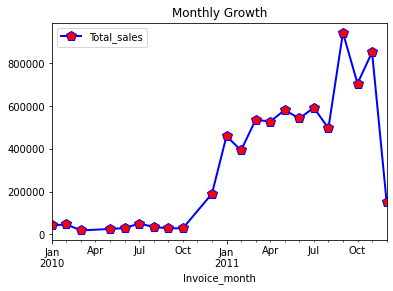

In [ ]:
#Let's plot the Monthly growth
plt.figure(figsize = (12,6))
tsales_month = uk_data.groupby('Invoice_month').Total_sales.sum().reset_index()
tsales_month.plot.line(x='Invoice_month',y='Total_sales',title='Monthly Growth',color = 'b',marker='p', markersize=10, linewidth=2,markerfacecolor='red')

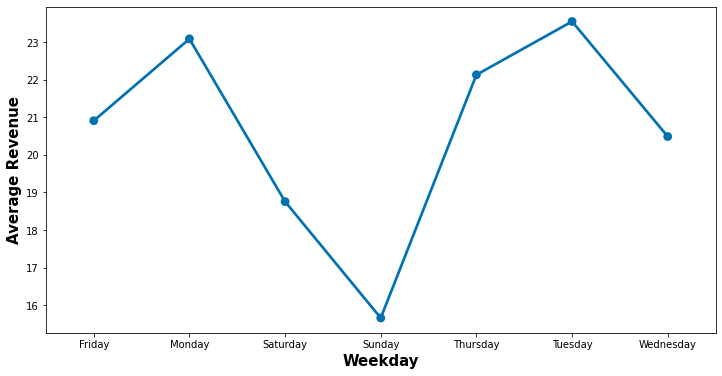

In [ ]:
#Bussiest day of the week
tsales_weekday = uk_data.groupby('Invoice_day').Total_sales.mean()
plt.figure(figsize = (12,6))
sns.pointplot(x=tsales_weekday.index, y=tsales_weekday.values)
plt.ylabel('Average Revenue',weight="bold",size=15)
plt.xlabel('Weekday',weight="bold",size=15)
plt.show()

##**Observation:**
Maximum average revenue was observed to be on the Thursday and Friday,On Tuesday also the revenue generated was comparitive.

Minimum average revenue was generated on Sundays.

##**Top 20 Products Sold From the Store**

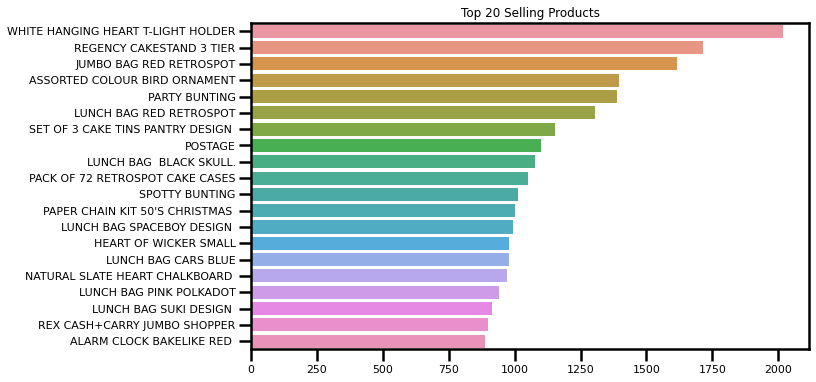

In [ ]:
# Creating the required Dataframe
top_products = online_data['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))

# Plotting the plot
sns.set_context("poster",font_scale=0.5)
sns.barplot(y=top_products.index,x=top_products.values)
plt.title('Top 20 Selling Products')
plt.show()

White Hanging Heart T-light holder is the top selling item followed by Regency Cakestand 3 Tier.

In [ ]:
#changing the datatype of the Customer id
uk_data['CustomerID'] = uk_data['CustomerID'].astype('int64')
#changing the datatype of the purchase_date
uk_data['purchase_date']=uk_data['purchase_date'].astype('datetime64[ns]')

In [ ]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349203 entries, 0 to 541893
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      349203 non-null  object        
 1   StockCode      349203 non-null  object        
 2   Description    349203 non-null  object        
 3   Quantity       349203 non-null  int64         
 4   InvoiceDate    349203 non-null  datetime64[ns]
 5   UnitPrice      349203 non-null  float64       
 6   CustomerID     349203 non-null  int64         
 7   Country        349203 non-null  object        
 8   Invoice_day    349203 non-null  object        
 9   Invoice_hour   349203 non-null  int64         
 10  Invoice_month  349203 non-null  period[M]     
 11  month          349203 non-null  object        
 12  purchase_date  349203 non-null  datetime64[ns]
 13  Total_sales    349203 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6

In [ ]:
#Removing the features that are not required for RFM 			
uk_data.drop(['Invoice_day','Invoice_hour','Invoice_month','month'],axis=1,inplace=True)

##**Create the RFM model (Recency, Frequency,Monetary value)**

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

Performing RFM Segmentation and RFM Analysis, Step by Step The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

Let's define Recency, Frequency and Monetary metrics that milestones for RFM Analysis process

Recency => How recent was the customer's last purchase? Number of days between analysis date and last invoice date

Frequency=> How often did this customer make a purchase in a given period? Number of purchases.

Monetary => How much money did the customer spend in a given period? In other words , How much money will the company potentially earn from a particular customer?

----> For recency, we should know the newest date of invoice in our dataset. According to that date, we can specify analysis date which will be using for next steps of our analysis.

In [ ]:
# knowing the latest date in our transaction history
uk_data["purchase_date"].max()

Timestamp('2011-12-10 00:00:00')


Maximum date is 2011-12-09 , Instead of using today date, we decide the most rational date , so we choose 2 days later of maximum date i.e. 2011-12-11.

In [ ]:
#choosing selected date in the ame of today's date
today_date = dt.datetime(2011, 12, 11)

In [ ]:
# Creating the RFM dataframe
rfm = uk_data.groupby(['CustomerID'],as_index=False).agg({'purchase_date': lambda purchase_date: (today_date - purchase_date.max()).days,
                                     'InvoiceNo': lambda InvoiceNo: InvoiceNo.count(),
                                     'Total_sales': lambda Total_sales: Total_sales.sum()}).rename(columns = {'purchase_date': 'recency',
                                                                                   'InvoiceNo': 'frequency',
                                                                                   'Total_sales': 'monetary'})

In [ ]:
# Having a look at the initial records of the dataset
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,327,1,77183.60
1,12747,24,103,4196.01
2,12748,6,4412,33053.19
3,12749,24,199,4090.88
4,12820,46,59,942.34


##**Customer Segmentation Using Quantiles**

Now that we have our values,we need to divide the customers into different quartiles for recency, frequency and monetary, and concatenating the numbers of each quartile

In [ ]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])

#Convert the quantile to dictionary
quantiles = quantiles.to_dict()
quantiles

{'CustomerID': {0.25: 14208.75, 0.5: 15569.5, 0.75: 16913.25},
 'recency': {0.25: 23.0, 0.5: 62.0, 0.75: 163.0},
 'frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'monetary': {0.25: 298.18500000000006,
  0.5: 644.9749999999999,
  0.75: 1571.285}}

In [ ]:
#Functions to create R, F and M segments.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# Now assign segments to customers using the abobe function
rfm['r_quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles,))
rfm['f_quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm['m_quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [ ]:
# Let's ahve a look for the applied changes
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346,327,1,77183.60,4,4,1
1,12747,24,103,4196.01,2,1,1
2,12748,6,4412,33053.19,1,1,1
3,12749,24,199,4090.88,2,1,1
4,12820,46,59,942.34,2,2,2


Interpretation of the segment in which the customer lies:
A score of 111 would be the highest achievable score, and a score of 444 the worst.

### Best customers :

RFM Score: 111:

They are the cream customers who have bought the most recent, the most often, and generated the most revenue.

### Big Spenders :

RFM Score: XX1

These are the customers who have generated the most revenue for your store as the montery equals 1 that is the maximum score for monetay.

### Loyal customers

RFM Score: X1X

They are the customers who arrive the most at the store to shop as there frequency equals 1 and the accounts the best rating.

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.r_quartile.map(str) + rfm.f_quartile.map(str) + rfm.m_quartile.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis = 1)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMGroup,RFMScore
0,12346,327,1,77183.60,4,4,1,441,9
1,12747,24,103,4196.01,2,1,1,211,4
2,12748,6,4412,33053.19,1,1,1,111,3
3,12749,24,199,4090.88,2,1,1,211,4
4,12820,46,59,942.34,2,2,2,222,6


##**Correlation Matrix**

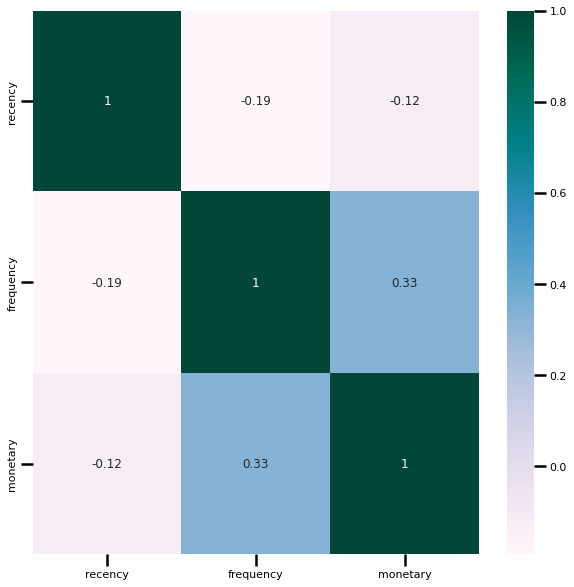

In [ ]:
# Generating the correlation matrix
corr_data= rfm[['recency','frequency','monetary']].corr()

# Plotting the correlation Matrix using the heat map
plt.figure(figsize=(10,10))
sns.heatmap(data=corr_data,cmap='PuBuGn',annot=True)
plt.show()

##**Observation from the Correlation Matrix :**
Frequency and Monetary are positively correlated with each other,that implies with an increase in frequency increases monetary value.
Frequency and Recency are negatively correlated with each other,that implies increase in frequency decreases monetary value.

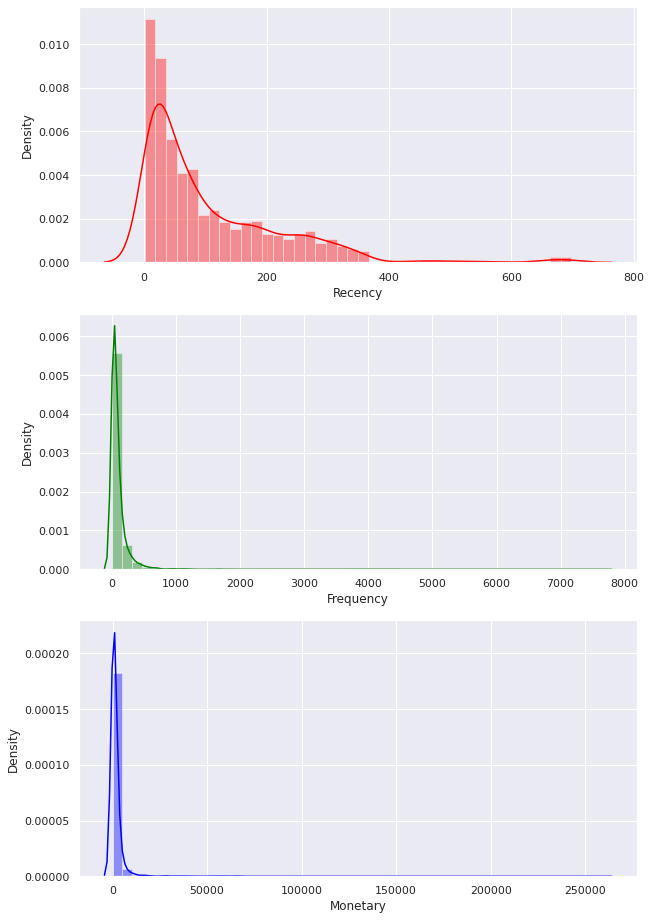

In [ ]:
# Plotting the distribution plot before passing in the models

# Distribution plot
plt.figure(figsize=(10,16))
sns.set_theme(style="darkgrid")

# Plot recency 
plt.subplot(3, 1, 1); sns.distplot(rfm.recency,color='Red',axlabel='Recency')

# Plot frequency 
plt.subplot(3, 1, 2); sns.distplot(rfm.frequency,color='Green',axlabel='Frequency')

# Plot monetary value 
plt.subplot(3, 1, 3); sns.distplot(rfm.monetary,color='Blue',axlabel='Monetary')

plt.show()

##**Observations:**
From the above plot we can infer that Recency is moderately skewed but Frequency and Monetary are extremely skewed.

Recency,Frequency and monetary all are positively skewed.

Recency,Frequency and monetary possess outlier values.

We need to treat the outliers and make these distributions normalised before fitting the data into the model.

In [ ]:
#performing log tranformation
data_log = np.log(rfm[['recency','frequency','monetary']]+1)

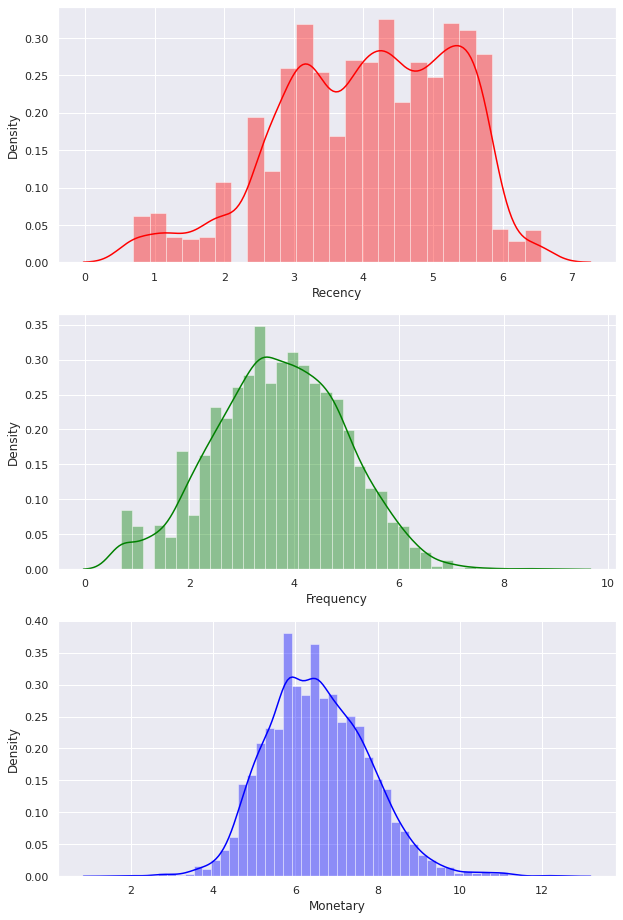

In [ ]:
# Plotting the distribution plot before passing in the models

sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,16))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_log.recency,color='Red',axlabel='Recency')

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_log.frequency,color='Green',axlabel='Frequency')

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_log.monetary,color='Blue',axlabel='Monetary')

plt.show()

In [ ]:
# Scale data
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler

scaler = RobustScaler()
normalized = scaler.fit_transform(data_log)

# Create a pandas DataFrame
norm = pd.DataFrame(data=normalized, index=data_log.index, columns=data_log.columns)
norm

,recency,frequency,monetary
0,0.858501,-1.771772,2.882792
1,-0.480931,0.546015,1.127858
2,-1.143308,2.744533,2.371678
3,-0.480931,0.929607,1.112569
4,-0.152454,0.223360,0.228219
...,...,...,...
3915,0.491443,-0.771772,-0.764788
3916,-1.223520,-0.958576,-1.245305
3917,0.645932,-0.673779,-0.773311
3918,-0.862846,1.682626,0.694988


Since,we have got our data in the form that can be passed into our model therefore we must now start to build a model.

##**Building the Model**
**Silhoutte Analysis**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

S(i) close to 0 means that the point is between two clusters
If it is closer to -1, then we would be better off assigning it to the other clusters.

If S(i) is close to 1, then the point belongs to the ‘correct’ cluster

Silhouette score for number of cluster(s) 2: 0.4036405003541254
Silhouette score for number of cluster(s) 3: 0.2944737570986216
Silhouette score for number of cluster(s) 4: 0.29766090473257606
Silhouette score for number of cluster(s) 5: 0.26942369672815925
Silhouette score for number of cluster(s) 6: 0.2728450968736252
Silhouette score for number of cluster(s) 7: 0.25860552221795813
Silhouette score for number of cluster(s) 8: 0.2552472026382451
Silhouette score for number of cluster(s) 9: 0.26295288305672415
Silhouette score for number of cluster(s) 10: 0.25686483568781504
Silhouette score for number of cluster(s) 11: 0.2553442750815201
Silhouette score for number of cluster(s) 12: 0.2608548013423563
Silhouette score for number of cluster(s) 13: 0.24778845230341423
Silhouette score for number of cluster(s) 14: 0.255620859863289
Silhouette score for number of cluster(s) 15: 0.2567049067200047
Silhouette score for number of cluster(s) 16: 0.2518415745295982
Silhouette score for number 

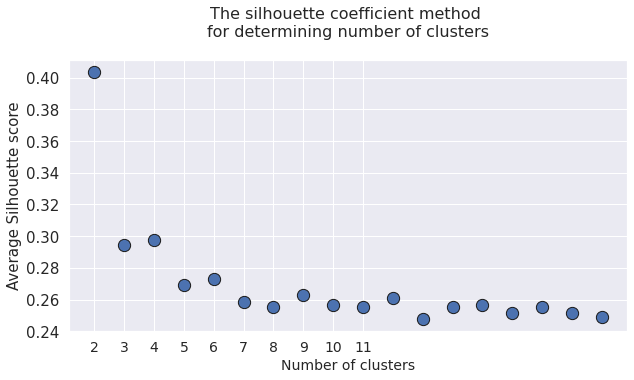

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
wcss_silhouette = []
for i in range(2,20):
    kmean = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(norm)
    predss = kmean.predict(norm)    
    silhouette = silhouette_score(norm,predss)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Average Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

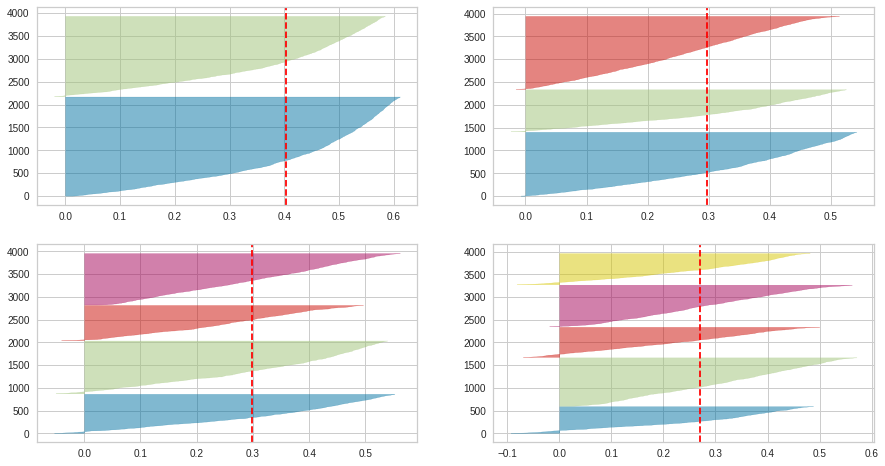

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(norm)

##**K-Means CLustering:**

Text(0, 0.5, 'Money Spend')

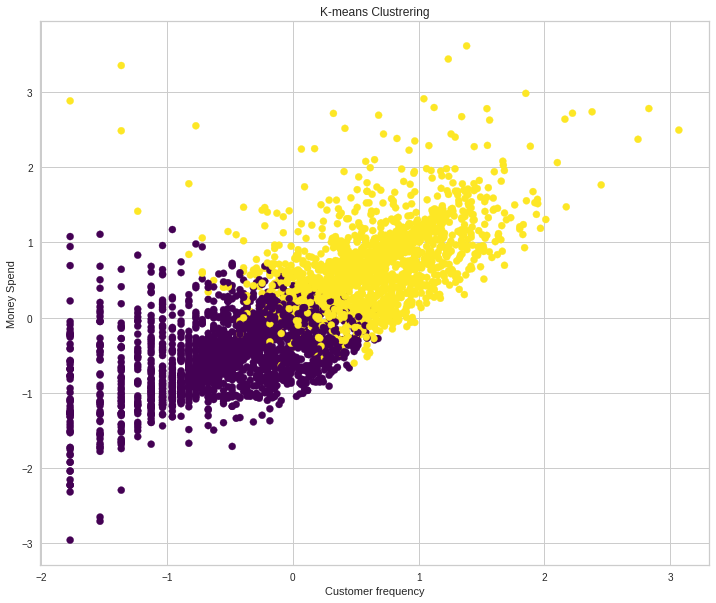

In [ ]:
# Scatter plot for K-means clustering
X=norm.values
plt.figure(figsize=(12,10))

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 1], X[:, 2], c=labels, s=50, cmap='viridis')

plt.title('K-means Clustrering')
plt.xlabel('Customer frequency')
plt.ylabel('Money Spend')

Hierarchical clustering
There are mainly two types of hierarchical clustering:

Agglomerative hierarchical clustering
Divisive Hierarchical clustering
For Our Analysis We we'll go with Agglomerative hierarchical clustering

**Silhoutte Analysis**

In [ ]:
# Fit the data to Agglomerative Clustering model
from sklearn.cluster import AgglomerativeClustering

Silhouette score for number of cluster(s) 2: 0.35247068834577283
Silhouette score for number of cluster(s) 3: 0.24409224240629465
Silhouette score for number of cluster(s) 4: 0.24470035285570688
Silhouette score for number of cluster(s) 5: 0.21106748322283858
Silhouette score for number of cluster(s) 6: 0.204315747672509
Silhouette score for number of cluster(s) 7: 0.191524506070878
Silhouette score for number of cluster(s) 8: 0.18824658150802984
Silhouette score for number of cluster(s) 9: 0.19292742547327602
Silhouette score for number of cluster(s) 10: 0.1947254306408221
Silhouette score for number of cluster(s) 11: 0.20443823726547533
Silhouette score for number of cluster(s) 12: 0.2070293151661032
Silhouette score for number of cluster(s) 13: 0.20832589645869137
Silhouette score for number of cluster(s) 14: 0.20899777704716882
Silhouette score for number of cluster(s) 15: 0.2085469998014609
Silhouette score for number of cluster(s) 16: 0.21149538446504126
Silhouette score for numb

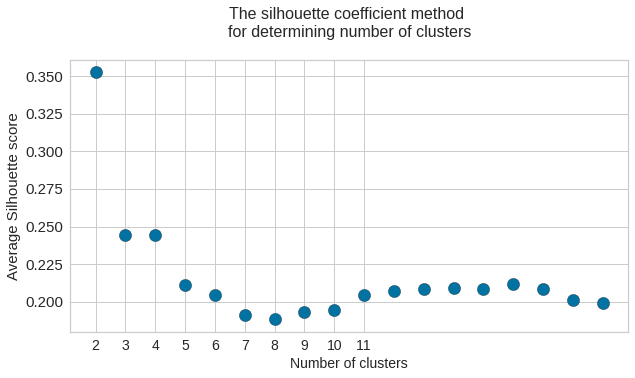

In [ ]:
# Calculate the silhoutte score for 19 different cluster from 2-20 
hcss_silhouette = []
for i in range(2,20):
    
    
    # Fit the data to Agglomerative Clustering model
    hc = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)    
    
    # Count silhouettte score for each cluster
    silhouette = silhouette_score(norm,y_hc)
    hcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,20)],y=hcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Average Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Majority of the transactions are from United Kingdom,other countries are costitute very small proportions in order to make our segmentation clean we will be going ahead with the United Kingdom data only.